In [18]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [19]:
# Load dataset
df = pd.read_csv("tweets.csv", encoding='latin1')

In [20]:
import pandas as pd

columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("tweets.csv", encoding='latin1', names=columns)


In [21]:
df['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [22]:
# Sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['text'].apply(get_sentiment)


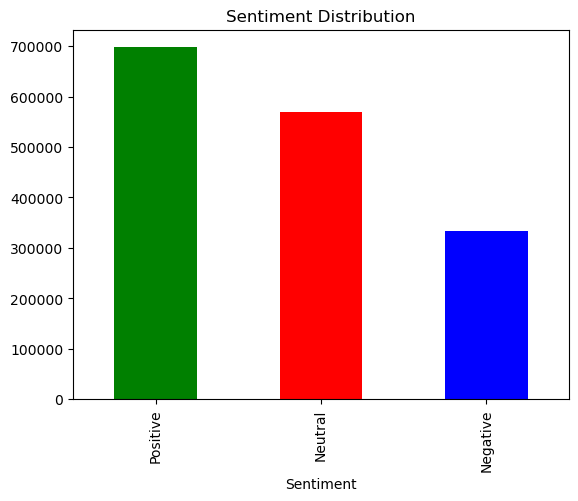

In [24]:
# Count plot
df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','blue'])
plt.title("Sentiment Distribution")
plt.savefig("count_plot.png", dpi=300, bbox_inches='tight')
plt.show()

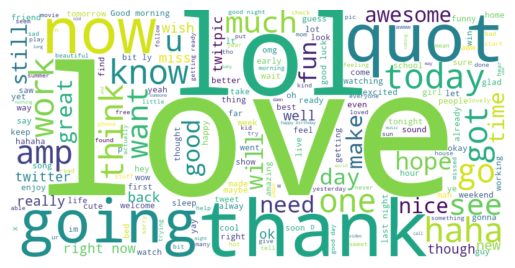

In [25]:
# WordCloud for positive tweets
positive_text = " ".join(df[df['Sentiment']=="Positive"]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("word_cloud.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Save results
df.to_csv("sentiment_results.csv", index=False)